# Geometric Objects - Spatial Data Model

* 싸이그래머 / DeepCity - PyGIS [1]
* 김무성

### Overview of geometric objects and Shapely -module

<img src="http://www.helsinki.fi/science/accessibility/maintenance/Kuvia/SpatialDataModel.PNG" width=700 />

## Point

In [2]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

In [3]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)

In [4]:
point2 = Point(7.2, -25.1)

In [5]:
point3 = Point(9.26, -2.456)

In [6]:
point3D = Point(9.26, -2.456, 0.57)

In [7]:
point_type = type(point1)

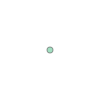

In [49]:
point1

In [9]:
print(point3D)

POINT Z (9.26 -2.456 0.57)


In [10]:
print(type(point1))

<class 'shapely.geometry.point.Point'>


### Point attributes and functions

In [11]:
# Get the coordinates
point_coords = point1.coords

In [12]:
# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

In [16]:
# Get x and y coordinates
xy = point_coords.xy
print(xy) 

(array('d', [2.2]), array('d', [4.2]))

In [17]:
# Get only x coordinates of Point1
x = point1.x
print(x)

2.2


In [18]:
# Whatabout y coordinate?
y = point1.y
print(y)

4.2


## LineString

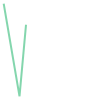

In [50]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])
line

In [20]:
# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [21]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [22]:
print(line2)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [23]:
type(line)

shapely.geometry.linestring.LineString

### LineString attributes and functions

In [24]:
# Get x and y coordinates of the line
lxy = line.xy
print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [25]:
# Extract x coordinates
line_x = lxy[0]
print(line_x)

array('d', [2.2, 7.2, 9.26])


In [26]:
# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]
print(line_y)

array('d', [4.2, -25.1, -2.456])


In [28]:
# Get the lenght of the line
l_length = line.length

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))

Length of our line: 52.46


In [29]:
# Get the centroid of the line
l_centroid = line.centroid

print("Centroid of our line: ", l_centroid)

Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)


In [30]:
# What type is the centroid?
centroid_type = type(l_centroid)

print("Type of the centroid:", centroid_type)

Type of the centroid: <class 'shapely.geometry.point.Point'>


## Polygon

In [31]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [32]:
# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

In [33]:
# Geometry type can be accessed as a String
poly_type = poly.geom_type

In [34]:
# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


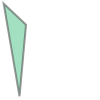

In [51]:
# Let's see how our Polygon looks like
print(poly)
poly

In [36]:
print(poly2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [37]:
print("Geometry type as text:", poly_type)

Geometry type as text: Polygon


In [38]:
print("Geometry how Python shows it:", poly_type2)

Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


#### Let’s create a Polygon with a hole inside

In [39]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [64]:
# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
hole

[[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [52]:
# World without a hole
world = Polygon(shell=world_exterior)

In [53]:
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


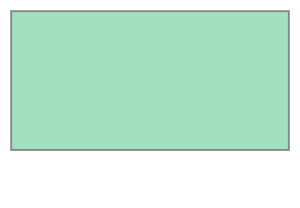

In [54]:
world

In [65]:
# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

In [66]:
print(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


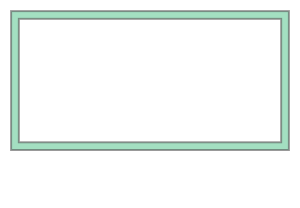

In [67]:
world_has_a_hole

# 참고자료
* [1]  Introduction to Python GIS -course 2018! - https://automating-gis-processes.github.io/CSC18/index.html